# Principal Component Analysis (PCA) from Scratch

## Overview 📈
In this project, I’m implementing a custom **Principal Component Analysis (PCA)** model from scratch using Python and NumPy. PCA is a technique used for dimensionality reduction while retaining the maximum variance in the data.

### Key Concepts:
- **Principal Component Analysis (PCA)**: A method used for reducing the number of features in a dataset by transforming it into a set of orthogonal components (principal components) that capture the most significant variance.
  
- **Eigenvalues and Eigenvectors**: Mathematical concepts that form the core of PCA. Eigenvalues represent the magnitude of variance along a principal component, and eigenvectors represent the directions of these components.
  
- **Covariance Matrix**: A matrix that represents the covariance (relationship) between different features in the dataset. It's used in PCA to understand the variance-covariance structure of the data.

---

## Objective 🎯
The goal of this project is to:
1. Implement a custom PCA class that performs dimensionality reduction.
   
2. Use the covariance matrix, eigenvalues, and eigenvectors to extract principal components.
   
3. Transform the original data into a lower-dimensional space while retaining as much variance as possible.

---

## PCA Explanation 🧠

### Principal Component Analysis Formula
In PCA, we project the data onto new axes (principal components) that maximize the variance in the dataset. The projection of the data onto the top \( k \) principal components is calculated as:

$$
X_{\text{projected}} = X \cdot W
$$

Where:
- `X`: Original data matrix.
- `W`: Matrix of top \( k \) eigenvectors (principal components).

---

### Covariance Matrix
To understand how the different features in the data relate to each other, we compute the **covariance matrix**:

$$
\text{Cov}(X) = \frac{1}{n-1} \cdot X^T X
$$

Where:
- `X`: Centered data matrix (mean subtracted).
- Cov(X): Covariance matrix representing how features vary with each other.

---

### Eigenvectors and Eigenvalues
The next step is to compute the **eigenvectors** and **eigenvalues** of the covariance matrix. Eigenvectors give us the direction of the principal components, and the corresponding eigenvalues tell us the magnitude of the variance along these components.

> **Eigenvalue Equation**:
>
> $$ A \cdot v = \lambda \cdot v $$
>
> Where:
> - \( A \): Covariance matrix.
> - \( v \): Eigenvector (principal component).
> - \( lambda \): Eigenvalue (variance magnitude).

---

### Selecting Principal Components
To reduce the dimensionality of the data, we select the top \( k \) eigenvectors corresponding to the largest eigenvalues. These eigenvectors represent the principal components that capture the most variance in the data.

---

### Dimensionality Reduction
After selecting the top \( k \) principal components, we project the data onto this new set of axes (principal components):

$$
X_{\text{projected}} = X \cdot W
$$

Where:
- \( W \) is the matrix formed by the top \( k \) eigenvectors.

---

## Implementation 🛠️

Below is the code for implementing PCA from scratch. The `PCA` class includes methods to:
1. **Standardize the Data**: 
   Center the data by subtracting the mean of each feature to ensure all features have a mean of zero.

2. **Compute the Covariance Matrix**: 
   This matrix captures the variance within and covariance between features.

3. **Compute Eigenvectors and Eigenvalues**:
   - Eigenvectors determine the directions of maximum variance in the data.
   - Eigenvalues indicate the amount of variance along each eigenvector.

4. **Sort Eigenvectors by Eigenvalues**: 
   The eigenvectors are sorted in descending order based on their corresponding eigenvalues to prioritize the directions of greatest variance.

5. **Select the Top k Eigenvectors**:
   Choose the top `k` eigenvectors to determine the reduced dimensionality space.

6. **Transform the Data**: 
   Project the original data onto the selected eigenvectors to reduce its dimensions.

---

# Let's code PCA from scratch

In [25]:
import numpy as np

class PCA:
    def __init__(self, k):
        """
        Initialize the PCA class.
        Args:
            k (int): Number of principal components to keep.
        """
        self.k = k  # Number of principal components
        self.mean = None  # Will hold the mean of the dataset
        self.eigenvectors = None  # Will store eigenvectors
        self.eigenvalues = None  # Will store eigenvalues
        self.components = None  # Will store top k principal components

    def standardize_data(self, X):
        """
        Standardize the data by centering it (subtracting the mean).
        Args:
            X (numpy.ndarray): Original dataset (n_samples x n_features).
        Returns:
            X_centered (numpy.ndarray): Dataset with mean removed.
        """
        self.mean = np.mean(X, axis=0)  # Calculate the mean for each feature
        X_centered = X - self.mean  # Subtract the mean from the dataset
        return X_centered

    def compute_covariance_matrix(self, X):
        """
        Compute the covariance matrix of the data.
        Args:
            X (numpy.ndarray): Standardized dataset.
        Returns:
            covariance_matrix (numpy.ndarray): Covariance matrix (n_features x n_features).
        """
        covariance_matrix = np.cov(X.T)  # Covariance matrix of the transposed dataset
        return covariance_matrix

    def compute_eigenvectors(self, cov_matrix):
        """
        Calculate the eigenvalues and eigenvectors of the covariance matrix.
        Args:
            cov_matrix (numpy.ndarray): Covariance matrix.
        Returns:
            eigenvalues (numpy.ndarray): Eigenvalues of the covariance matrix.
            eigenvectors (numpy.ndarray): Eigenvectors of the covariance matrix.
        """
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)  # Eigen decomposition
        return eigenvalues, eigenvectors

    def sort_eigenvectors(self, eigenvalues, eigenvectors):
        """
        Sort eigenvalues and eigenvectors in descending order of eigenvalues.
        Args:
            eigenvalues (numpy.ndarray): Array of eigenvalues.
            eigenvectors (numpy.ndarray): Matrix of eigenvectors.
        Returns:
            sorted_eigenvalues (numpy.ndarray): Eigenvalues sorted in descending order.
            sorted_eigenvectors (numpy.ndarray): Corresponding eigenvectors sorted.
        """
        sorted_indices = np.argsort(eigenvalues)[::-1]  # Get indices for descending order
        sorted_eigenvalues = eigenvalues[sorted_indices]  # Sort eigenvalues
        sorted_eigenvectors = eigenvectors[:, sorted_indices]  # Sort eigenvectors by eigenvalues
        return sorted_eigenvalues, sorted_eigenvectors

    def fit(self, X):
        """
        Fit the PCA model to the dataset.
        Steps:
            1. Standardize the data (center it by subtracting the mean).
            2. Compute the covariance matrix.
            3. Compute eigenvalues and eigenvectors.
            4. Sort eigenvectors based on eigenvalues.
            5. Select top k eigenvectors (principal components).
        Args:
            X (numpy.ndarray): Original dataset (n_samples x n_features).
        """
        # Step 1: Standardize the data
        X_centered = self.standardize_data(X)

        # Step 2: Compute the covariance matrix
        cov_matrix = self.compute_covariance_matrix(X_centered)

        # Step 3: Compute eigenvalues and eigenvectors
        eigenvalues, eigenvectors = self.compute_eigenvectors(cov_matrix)

        # Step 4: Sort eigenvalues and eigenvectors
        self.eigenvalues, self.eigenvectors = self.sort_eigenvectors(eigenvalues, eigenvectors)

        # Step 5: Keep only the top k eigenvectors
        self.components = self.eigenvectors[:, :self.k]

    def transform(self, X):
        """
        Transform the dataset by projecting it onto the top k principal components.
        Args:
            X (numpy.ndarray): Original dataset (n_samples x n_features).
        Returns:
            X_projected (numpy.ndarray): Transformed dataset (n_samples x k).
        """
        # Center the dataset using the stored mean
        X_centered = X - self.mean

        # Project the data onto the top k principal components
        X_projected = X_centered.dot(self.components)
        return X_projected

    def fit_transform(self, X):
        """
        Fit the PCA model to the dataset and return the transformed data.
        Args:
            X (numpy.ndarray): Original dataset (n_samples x n_features).
        Returns:
            X_projected (numpy.ndarray): Transformed dataset (n_samples x k).
        """
        self.fit(X)  # Fit the model to learn the principal components
        return self.transform(X)  # Transform the data

# Let's implement PCA from scratch

Original Data:
 [[2.5 3.5 3.1 4.2 5.1 2.8 3.3]
 [3.6 2.9 3.5 4.  5.6 3.  3.7]
 [4.2 3.4 3.8 4.4 5.8 3.2 4. ]
 [4.7 2.6 4.1 4.6 6.  3.4 4.2]
 [5.2 3.2 4.2 4.9 6.3 3.6 4.5]]

Projected Data (Top 3 Principal Components):
 [[-1.97852142  0.21014323 -0.14303364]
 [-0.64885656 -0.38540527  0.16666802]
 [ 0.13494492  0.25028238  0.16798868]
 [ 0.92487269 -0.38825191 -0.16004663]
 [ 1.56756038  0.31323157 -0.03157642]]


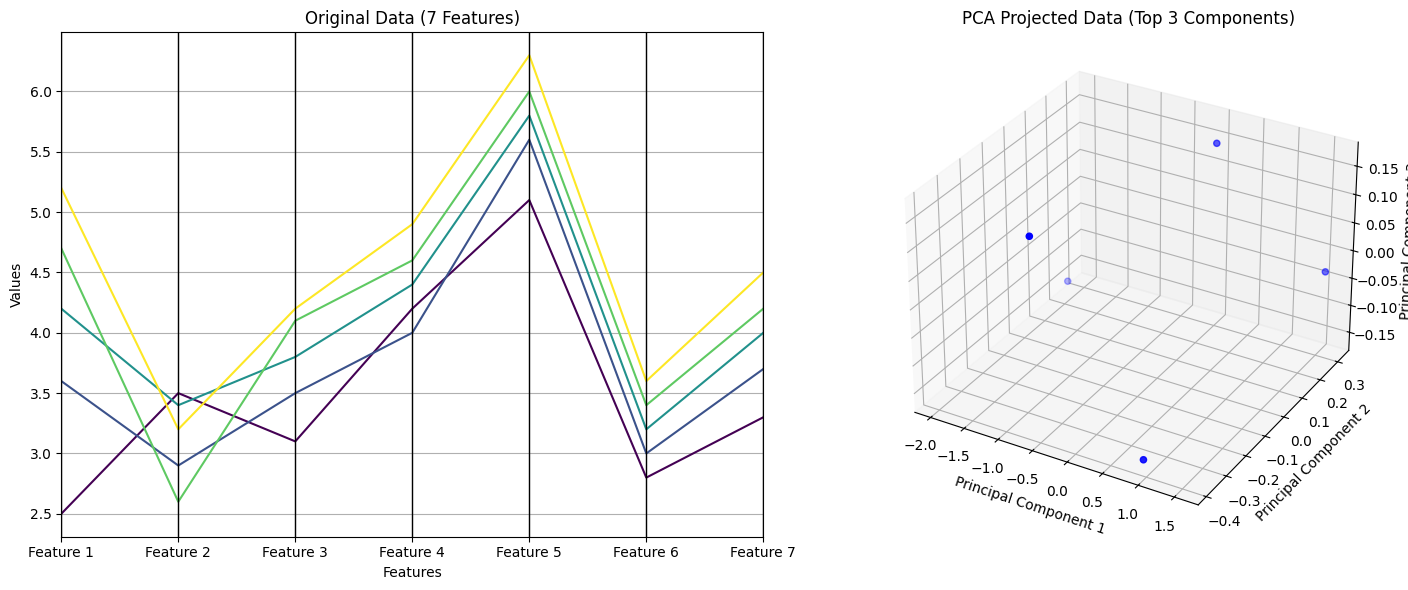

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# Example usage

# Create a new synthetic dataset with 7 features
X = np.array([[2.5, 3.5, 3.1, 4.2, 5.1, 2.8, 3.3],
              [3.6, 2.9, 3.5, 4.0, 5.6, 3.0, 3.7],
              [4.2, 3.4, 3.8, 4.4, 5.8, 3.2, 4.0],
              [4.7, 2.6, 4.1, 4.6, 6.0, 3.4, 4.2],
              [5.2, 3.2, 4.2, 4.9, 6.3, 3.6, 4.5]])

# Create PCA instance and reduce to 3 principal components
pca = PCA(k=3)
X_projected = pca.fit_transform(X)

# Visualization
fig = plt.figure(figsize=(15, 6))

# Output the Results
print("Original Data:\n", X)
print("\nProjected Data (Top 3 Principal Components):\n", X_projected)

# Original Data (7 Features) as Parallel Coordinates Plot
ax1 = fig.add_subplot(121)
df_original = pd.DataFrame(X, columns=[f"Feature {i+1}" for i in range(X.shape[1])])
df_original["Index"] = range(len(X))  # Add an index column for parallel coordinates
parallel_coordinates(df_original, class_column="Index", colormap='viridis')
ax1.set_title('Original Data (7 Features)')
ax1.set_xlabel('Features')
ax1.set_ylabel('Values')
ax1.legend_.remove()  # Remove legend to simplify visualization

# PCA Projected Data (3 Components) as 3D Scatter Plot
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_projected[:, 0], X_projected[:, 1], X_projected[:, 2], color='blue', marker='o')
ax2.set_title('PCA Projected Data (Top 3 Components)')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.set_zlabel('Principal Component 3')

plt.tight_layout()
plt.show()

# When to Use PCA 🌟

Principal Component Analysis (PCA) is a versatile dimensionality reduction technique with a wide range of applications. Here are scenarios where PCA is particularly useful:

- **High-Dimensional Data**: PCA is ideal for datasets with a large number of features, helping to reduce the number of dimensions without losing important information.  
  > - **The Curse of Dimensionality**: When you have too many features, the data becomes spread out and harder to analyze. PCA helps by reducing the number of features while keeping the key information.

- **Visualizing Complex Data**: When working with data that has many features, PCA can reduce it to 2D or 3D, making it easier to see patterns.

- **Feature Extraction**: PCA can find the most important features, helping you focus on the ones that have the most impact on the data.

- **Preprocessing for Machine Learning**: PCA can make machine learning models work better by reducing unnecessary data and removing noise.

- **Handling Highly Related Features**: PCA can transform correlated features into independent ones, which helps avoid problems in predictive models.

---

# Pros of PCA ✅

- **Dimensionality Reduction**: PCA simplifies datasets with many features, making it easier and faster to analyze.

- **Noise Reduction**: By keeping only the important components, PCA helps remove unwanted noise from the data.

- **Improved Visualization**: PCA allows you to see complex data in 2D or 3D, which makes it easier to find patterns.

- **Handles Multicollinearity**: PCA turns correlated features into independent components, which helps in creating more stable models.

- **Feature Engineering**: PCA creates new features that can improve the performance of machine learning models.

---

# Cons of PCA ❌

- **Loss of Clarity**: The new components created by PCA are combinations of the original features, making them harder to understand.

- **Assumes Linearity**: PCA assumes that relationships between features are straight-line (linear), which may not always be true.

- **Sensitive to Scaling**: PCA is affected by the scale of the data, so it is important to standardize the data before using PCA.

- **Focuses Only on Variance**: PCA only looks at the variation in data, and might not capture other important factors like class separability.

- **Computationally Intensive**: For very large datasets, PCA can take a lot of time and computer resources.

---

## Conclusion 🎯

PCA is a powerful technique for simplifying and understanding complex datasets. It is especially helpful when dealing with a large number of features and the curse of dimensionality. While it has some limitations, it can greatly improve data analysis and machine learning workflows when used properly.